In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the character metadata
movie_metadata_columns = [
    "Wikipedia movie ID", 
    "Freebase movie ID", 
    "Movie name", 
    "Movie release date",
    "Movie box office revenue", 
    "Movie runtime", 
    "Languages", 
    "Countries", 
    "Genres"
]

movie_metadata = pd.read_csv('./data/movie.metadata.tsv', sep='\t', header=None, names=movie_metadata_columns, encoding='utf-8', error_bad_lines=False)

movie_metadata.head()

C:\Users\arist\AppData\Local\Temp\ipykernel_20644\1536891884.py:14: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  movie_metadata = pd.read_csv('./data/movie.metadata.tsv', sep='\t', header=None, names=movie_metadata_columns, encoding='utf-8', error_bad_lines=False)


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [3]:


character_metadata_columns = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor date of birth",
    "Actor gender",
    "Actor height (in meters)",
    "Actor ethnicity (Freebase ID)",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID"
]

character_metadata = pd.read_csv('./data/character.metadata.tsv', sep='\t', names=character_metadata_columns)

character_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


Parsing the json-like columns of the movie metadata dataframe

In [4]:
def parse_encoded_col(encoded_str):
    try:
        return ast.literal_eval(encoded_str)
    except (ValueError, SyntaxError):
        return {}

In [5]:
# Apply the parse_encoded_col function to relevant columns
movie_metadata['Languages'] = movie_metadata['Languages'].apply(parse_encoded_col)
movie_metadata['Countries'] = movie_metadata['Countries'].apply(parse_encoded_col)
movie_metadata['Genres'] = movie_metadata['Genres'].apply(parse_encoded_col)

# Extract values from the dictionaries (as lists)
movie_metadata['Languages'] = movie_metadata['Languages'].apply(lambda x: list(x.values()))
movie_metadata['Countries'] = movie_metadata['Countries'].apply(lambda x: list(x.values()))
movie_metadata['Genres'] = movie_metadata['Genres'].apply(lambda x: list(x.values()))

# Display the parsed columns
movie_metadata[['Movie name', 'Languages', 'Countries', 'Genres']].head()

,Movie name,Languages,Countries,Genres
0,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,Getting Away with Murder: The JonBenét Ramsey ...,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,Brun bitter,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,White Of The Eye,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,A Woman in Flames,[German Language],[Germany],[Drama]


In [6]:
# Convert 'Movie release date' to datetime
movie_metadata['Movie release date'] = pd.to_datetime(movie_metadata['Movie release date'], errors='coerce')

# Create separate Year, Month, Day columns
movie_metadata['Year'] = movie_metadata['Movie release date'].dt.year
movie_metadata['Month'] = movie_metadata['Movie release date'].dt.month
movie_metadata['Day'] = movie_metadata['Movie release date'].dt.day

# Display the modified dataframe with the new columns
movie_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Languages,Countries,Genres,Year,Month,Day
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001.0,8.0,24.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000.0,2.0,16.0
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988.0,1.0,1.0
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987.0,1.0,1.0
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[German Language],[Germany],[Drama],1983.0,1.0,1.0


Reducing the number of genres present in the dataset

In [7]:
genre_mapping_dict = {
    "Softcore Porn": ["Adult"],
    "Prison film": ["Prison"],
    "Pinku eiga": ["Adult", "Japanese", "Asian"],
    "Inventions & Innovations": None, 
    "Bruceploitation": ["Martial Arts", "Exploitation", "Low Budget"],
    "Tollywood": ["Indian", "Asian"],
    "Instrumental Music": ["Music/Dance"],
    "Splatter film": ["Horror"],
    "Female buddy film": ["Adventure", "Comedy", "Women"],
    "Detective fiction": ["Crime", "Thriller"],                 # 10
    "Dystopia": ["Dystopia"],
    "Black comedy": ["Comedy"],
    "History": ["History"],
    "Silhouette animation": ["Animation"],
    "Combat Films": ["Action"],
    "Educational": ["Educational"],
    "Heaven-Can-Wait Fantasies": None,
    "Outlaw": ["Crime"],
    "Marriage Drama": ["Drama", "Women"],
    "Health & Fitness": ["Sport"],                              # 20
    "Stand-up comedy": ["Comedy"],
    "Sci-Fi Adventure": ["Science Fiction", "Adventure"],
    "Road-Horror": ["Horror"],
    "Anthology": ["Anthology"],
    "Biography": ["Biography"],
    "Doomsday film": ["Dystopia"],
    "Malayalam Cinema": ["Indian"],
    "Musical comedy": ["Musical", "Comedy"],
    "Chick flick": ["Romance", "Teen", "Women"],
    "Action/Adventure": ["Action", "Adventure"],                # 30
    "Horror Comedy": ["Horror", "Comedy"],
    "Spaghetti Western": ["Western", "European"],
    "Crime Drama": ["Crime", "Drama"],
    "Monster": ["Horror"],
    "Kafkaesque": ["Dystopian", "Psychological"],
    "Filipino": ["Filipino", "Asian"],
    "Movie serial": ["Action"],
    "War effort": ["Politics", "War"],
    "Extreme Sports": ["Sports"],
    "Sex comedy": ["Adult", "Comedy"],                        # 40
    "Documentary": ["Documentary"], 
    "B-Western": ["Western", "Low Budget"],
    "Existentialism": ["Philosophical"],
    "Demonic child": ["Horror"],
    "Buddy film": ["Adventure", "Comedy"],
    "Early Black Cinema": ["Black Cinema"],
    "Therimin music": ["Music/Dance"],
    "Coming-of-age film": ["Social"],
    "Sexploitation": ["Adult", "Exploitation", "Low Budget"],
    "Outlaw biker film": ["Crime"],                         # 50
    "Gross out": ["Horror"],
    "Drama": ["Drama"],
    "Neorealism": ["Art Film"],
    "Christmas movie": ["Holidays"],
    "British New Wave": ["Art Film", "European"],
    "Comedy of Errors": ["Comedy"],
    "Computer Animation": ["Animation"],
    "Children's/Family": ["Kids", "Family"],
    "Surrealism": ["Art Film"],
    "Suspense": ["Thriller"],                               # 60
    "Dogme 95": ["Avant-Garde"],
    "Family Film": ["Family"],
    "Stop motion": ["Stop Motion"],
    "Mockumentary": ["Documentary"],
    "Ealing Comedies": ["Comedy"],
    "Czechoslovak New Wave": ["Art Film", "European"],
    "Archives and records": ["History"],
    "Social issues": ["Social"],
    "Environmental Science": ["Nature", "Educational"],
    "Short Film": ["Short Film"],                           # 70
    "Religious Film": ["Religious"],
    "The Netherlands in World War II": ["History", "War"],
    "Propaganda film": ["Politics"],
    "Historical Epic": ["History", "Epic"],
    "Action": ["Action"],
    "Horror": ["Horror"],
    "C-Movie": ["Low Budget"],
    "Film-Opera": ["Music/Dance"],
    "Period piece": ["History", "Drama"],
    "Silent film": ["Silent"],                              # 80
    "Political thriller": ["Politics", "Thriller"],
    "Absurdism": ["Art Film", "Philosophical"],
    "Gulf War": ["History", "War"],
    "Humour": ["Comedy"],
    "Sports": ["Sports"],
    "Bollywood": ["Indian"],
    "Historical Documentaries": ["History", "Documentary"],
    "Tokusatsu": ["Japanese"],
    "Road movie": ["Adventure"],
    "Conspiracy fiction": ["Politics", "Fiction"],          # 90
    "Punk rock": ["Music/Dance"],
    "Singing cowboy": ["Music/Dance", "Western"],
    "Breakdance": ["Music/Dance"],
    "Fictional film": ["Fiction"],
    "Feature film": None,
    "Epic": ["Epic"],
    "Journalism": ["Politics"],
    "Buddy Picture": ["Adventure", "Comedy"],
    "Children's Issues": ["Social"],
    "Family-Oriented Adventure": ["Family", "Adventure"],   # 100
    "Psychological thriller": ["Psychological", "Thriller"],
    "Children's": ["Kids"],
    "Z movie": ["Low Budget"],
    "Statutory rape": ["Adult"],
    "Mumblecore": ["Low Budget"],
    "Nature": ["Nature"],
    "Teen": ["Teen"],
    "Superhero movie": ["Action", "Science Fiction"],
    "Biographical film": ["Biography"],
    "British Empire Film": ["History", "War"],              # 110
    "Experimental film": ["Avant-Garde"],
    "Courtroom Drama": ["Drama"],
    "Comedy of manners": ["Comedy"],
    "Homoeroticism": ["LGBTQ", "Adult"],
    "Musical Drama": ["Musical", "Drama"],
    "Backstage Musical": ["Music/Dance"],
    "Screwball comedy": ["Romance", "Comedy"],
    "Libraries and librarians": None,
    "Erotica": ["Adult"],
    "Plague": ["Dystopian"],                                # 120
    "Martial Arts Film": ["Martial Arts"],
    "Slice of life story": ["Biography"],
    "Satire": ["Comedy"],
    "Animal Picture": ["Animation"],
    "LGBT": ["LGBTQ"],
    "Film adaptation": ["Film Adaptation"],
    "Alien Film": ["Horror"],
    "Boxing": ["Sports"],
    "Vampire movies": ["Horror"],
    "Parkour in popular culture": ["Sports"],               # 130
    "Whodunit": ["Crime"],
    "Revisionist Western": ["Western"],
    "World History": ["History"],
    "News": ["Politics"],
    "Political satire": ["Politics", "Comedy"],
    "Costume Horror": ["Horror"],
    "Linguistics": None,
    "Alien invasion": ["Horror"],
    "Indie": ["Independent"],
    "Master Criminal Films": ["Crime"],                     # 140
    "Anime": ["Animated", "Japanese"],
    "Haunted House Film": ["Horror"],
    "Baseball": ["Sport"],
    "Erotic thriller": ["Adult", "Thriller"],
    "B-movie": ["Low Budget"],
    "Foreign legion": ["War", "History"],
    "Biker Film": ["Sport"],
    "Political Documetary": ["Politics", "Documentary"],
    "Social problem film": ["Social"],
    "Detective": ["Crime"],                                 # 150
    "Blaxploitation": ["Black Cinema", "Exploitation", "Low Budget"],
    "Gangster Film": ["Crime"],
    "Education": ["Educational"],
    "Romantic drama": ["Romance", "Drama", "Women"],
    "Auto racing": ["Cars"],
    "Gender Issues": ["Gender Issues", "Social"],
    "Period Horror": ["Horror"],
    "Inspirational Drama": ["Drama"],
    "Fantasy": ["Fantasy"],
    "Airplanes and airports": None,                         # 160
    "Swashbuckler films": ["Action"],
    "Time travel": ["Science Fiction"],
    "Romantic fantasy": ["Romance", "Fantasy"],
    "Beach Party film": ["Beach"],
    "Comedy-drama": ["Comedy", "Drama"],
    "Americana": ["USA"],
    "Business": None,
    "Illnesses & Disabilities": ["Social", "Medical"],
    "Nuclear warfare": ["Dystopian", "War"],
    "Crime Thriller": ["Crime", "Thriller"],                # 170
    "Steampunk": ["Science Fiction", "Futuristic"],
    "Children's Entertainment": ["Kids"],
    "Anti-war": ["Social", "War"],
    "Star vehicle": ["Start Vehicle"],
    "Feminist Film": ["Feminism"],
    "Gay Themed": ["LGBTQ"],
    "World cinema": ["World Cinema"],
    "Chase Movie": ["Action", "Cars"],
    "Hip hop movies": ["Music/Dance", "Black Cinema"],
    "Gothic Film": ["Horror", "Art Film"],                  # 180
    "Children's Fantasy": ["Fantasy", "Kids"],
    "Film noir": ["Crime", "Drama"],
    "Romantic comedy": ["Romance", "Comedy"],
    "Western": ["Western"],
    "Caper story": ["Crime"],
    "Samurai cinema": ["Action", "Japanese"],
    "Animated Musical": ["Animated", "Music/Dance"],
    "Cult": ["Religious"],
    "Science Fiction": ["Science Fiction"],
    "Crime Fiction": ["Crime", "Fiction"],
    "Disaster": ["Dystopian"],                            # 190
    "Indian Western": ["Indian"],
    "Black-and-white": ["Black and White"],
    "Sponsored film": ["Sponsored"],
    "Psychological horror": ["Psychological", "Horror"],
    "Television movie": ["Television"],
    "Legal drama": ["Social", "Drama"],
    "Addiction Drama": ["Drama"],
    "Fan film": None,
    "Culture & Society": ["Social"],                  # 200
    "Sci Fi Pictures original films": ["Science Fiction"],
    "Heist": ["Crime"],
    "Docudrama": ["Documentary", "Drama"],
    "Buddy cop": ["Crime", "Adventure"],
    "Spy": ["Crime"],
    "Animation": ["Animation"],
    "Horse racing": ["Sports"],
    "Superhero": ["Action", "Science Fiction"],
    "Cold War": ["History"],
    "Dance": ["Music/Dance"],                      # 210
    "Goat gland": None,
    "Tragedy": ["Drama"],
    "Finance & Investing": None,
    "Film": None,
    "Anti-war film": ["Social", "War"],
    "Graphic & Applied Arts": None,
    "Pornography": ["Adult"],
    "Escape Film": ["Prison"],
    "Language & Literature": ["Literary"],
    "Bengali Cinema": ["Social", "Indian", "Asian"],                 # 220
    "Essay Film": ["Literary"],
    "Family & Personal Relationships": ["Social"],
    "Private military company": None,
    "Crime Comedy": ["Crime", "Comedy"],
    "Mystery": ["Thriller"],
    "Zombie Film": ["Horror", "Dystopian"],
    "Concert film": ["Music/Dance"],
    "Media Studies": ["Social"],
    "Anthropology": ["Social"],
    "Hybrid Western": ["Western"],
    "Heavenly Comedy": ["Comedy"],
    "Ensemble Film": ["Ensemble"],
    "Comedy": ["Comedy"],
    "Women in prison films": ["Prison"],
    "Space western": ["Western", "Science Fiction"],
    "Thriller": ["Thriller"],
    "Workplace Comedy": ["Comedy"],
    "Gay": ["LGBTQ"],
    "Animated cartoon": ["Animated"],
    "Fantasy Adventure": ["Fantasy", "Adventure"],
    "Music": ["Music/Dance"],
    "Supermarionation": None,
    "Adventure Comedy": ["Adventure", "Comedy"],
    "Art film": ["Art Film"],
    "Science fiction Western": ["Western", "Science Fiction"],
    "Sword and sorcery films": ["Science Fiction"],
    "Historical fiction": ["History", "Fiction"],
    "Glamorized Spy Film": ["Crime"],
    "Future noir": ["Crime", "Drama", "Science Fiction"],
    "Christian film": ["Religious"],
    "Childhood Drama": ["Drama"],
    "Erotic Drama": ["Adult", "Drama"],
    "Kitchen sink realism": ["Art Film"],
    "Fantasy Comedy": ["Fantasy", "Comedy"],
    "Clay animation": ["Stop Motion"],
    "Romantic thriller": ["Romance", "Thriller"],
    "Gay pornography": ["Adult", "LGBTQ"],
    "Filipino Movies": ["Filipino", "Asian"],
    "Comedy Thriller": ["Comedy", "Thriller"],
    "Biopic [feature]": ["Biography"],
    "Ninja movie": ["Action"],
    "Comedy Western": ["Comedy", "Western"],
    "Epic Western": ["Epic", "Western"],
    "Wuxia": ["Martial Arts", "Chinese"],
    "Prison escape": ["Prison"],
    "Tamil cinema": ["Indian"],
    "Pornographic movie": ["Adult"],
    "Media Satire": ["Politics", "Comedy"],
    "Supernatural": ["Science Fiction"],
    "Albino bias": None,
    "Movies About Gladiators": ["Action", "History"],
    "Action Comedy": ["Action", "Comedy"],
    "Werewolf fiction": ["Horror", "Fiction"],
    "Space opera": ["Science Fiction"],
    "Latino": ["Latino"],
    "Reboot": ["Reboot"],
    "Revisionist Fairy Tale": None,
    "Animals": ["Nature"],
    "Albino bias": None,
    "Action Comedy": ["Action", "Comedy"],
    "Werewolf fiction": ["Horror", "Fiction"],
    "Space opera": ["Science Fiction"],
    "Reboot": ["Reboot"],
    "Revisionist Fairy Tale": None,
    "Animals": ["Nature"],
    "Sci-Fi Thriller": ["Science Fiction", "Thriller"],
    "Political drama": ["Politics", "Drama"],
    "Mondo film": ["Documentary", "Horror"],
    "Costume Adventure": ["Adventure"],
    "Giallo": ["Thriller", "Psychological", "Horror"],
    "Sword and Sandal": ["History"],
    "Adult": ["Adult"],
    "Expressionism": ["Art Film"],
    "Gross-out film": ["Horror"],
    "Fairy tale": ["Science Fiction"],
    "Tragicomedy": ["Drama", "Comedy"],
    "Point of view shot": None,
    "Chinese Movies": ["Chinese"],
    "Slapstick": ["Comedy"],
    "Northern": ["Western"],
    "Sword and sorcery": ["Science Fiction", "Adventure"],
    "Prison": ["Prison"],
    "Courtroom Comedy": ["Social", "Comedy"],
    "Coming of age": ["Social"],
    "School story": ["Social"],
    "New Queer Cinema": ["LGBTQ"],
    "Comdedy": ["Comedy"],
    "Exploitation": ["Exploitation", "Low Budget"],
    "Crime": ["Crime"],
    "Revenge": ["Drama"],
    "Costume drama": ["Drama"],
    "Medical fiction": ["Medical", "Fiction"],
    "Avant-garde": ["Avant-Garde"],
    "Parody": ["Comedy"],
    "Action Thrillers": ["Action", "Thrillers"],
    "Apocalyptic and post-apocalyptic fiction": ["Dystopian", "Fiction"],
    "Hagiography": ["Religious"],
    "Creature Film": ["Horror"],
    "New Hollywood": ["USA"],
    "Adventure": ["Adventure"],
    "Jukebox musical": ["Music/Dance"],
    "Interpersonal Relationships": ["Social"],
    "Acid western": ["Western"],
    "Law & Crime": ["Social", "Crime"],
    "Juvenile Delinquency Film": ["Crime"],
    "Race movie": ["Cars"],
    "Natural disaster": ["Nature"],
    "Slasher": ["Horror"],
    "Live action": ["Animation"],
    "Monster movie": ["Horror"],
    "Jungle Film": ["Nature"],
    "Bloopers & Candid Camera": None,
    "Sci-Fi Horror": ["Science Fiction", "Horror"],
    "Operetta": ["Music/Dance", "Art Film"],
    "Fantasy Drama": ["Fantasy", "Drama"],
    "Melodrama": ["Drama"],
    "Stoner film": ["Comedy"],
    "Psycho-biddy": ["Horror", "Thriller"],
    "Rockumentary": ["Music/Dance", "Documentary"],
    "War film": ["War"],
    "Archaeology": None,
    "Holiday Film": ["Holidays"],
    "Filmed Play": None,
    "Family Drama": ["Drama"],
    "Natural horror films": ["Nature", "Horror"],
    "Musical": ["Music/Dance"],
    "Political cinema": ["Politics"],
    "Cyberpunk": ["Science Fiction", "Dystopian", "Futuristic"],
    "Romance Film": ["Romance"],
    "Comedy horror": ["Comedy", "Horror"],
    "Roadshow/Carny": ["Art Film"],
    "Remake": ["Remake"],
    "Domestic Comedy": ["Comedy"],
    "Beach Film": ["Beach"],
    "Pre-Code": ["USA"],
    "Roadshow theatrical release": None,
    "Comedy film": ["Comedy"],
    "Travel": None,
    "Computers": None,
    "Historical drama": ["History", "Drama"],
    "Film & Television History": ["History"],
    "Neo-noir": ["Crime", "Drama"],
    "Gay Interest": ["LBGTQ"],
    "Hardcore pornography": ["Adult"],
    "Mythological Fantasy": ["Fantasy", "Fiction"],
    "Camp": ["Art Film"],
    "Film à clef": ["Fiction"],
    "Patriotic film": ["USA", "Propaganda"],
    "Japanese Movies": ["Japanese", "Asian"],
    "Cavalry Film": ["Western", "USA"],
}

In [8]:
# Assuming movie_metadata is your existing DataFrame and it has a 'Genres' column with the old genres
# Also assuming genre_mapping_dict is the dictionary with your genre mappings

# Define the mapping function
def map_genres(old_genres_list, mapping_dict):
    new_genres_list = []
    for genre in old_genres_list:
        # Get the new genres from the dictionary, if not found or None, it will return an empty list
        mapped = mapping_dict.get(genre, [])
        if mapped is not None:
            new_genres_list.extend(mapped)
    # Return the unique genres after mapping
    return list(set(new_genres_list))

# Map the genres for each movie in the DataFrame
movie_metadata['Genres Reduced'] = movie_metadata['Genres'].apply(lambda x: map_genres(x, genre_mapping_dict))

# This will add the 'Genres Reduced' column to the movie_metadata DataFrame


In [9]:
unique_genres = set(x for l in movie_metadata['Genres Reduced'] for x in l)
print('There are {} unique genres:'.format(len(unique_genres)))

for genre in unique_genres:
    print(genre)

There are 78 unique genres:
Philosophical
Martial Arts
Exploitation
History
World Cinema
LBGTQ
Fantasy
Educational
Action
Short Film
Drama
Holidays
Romance
Art Film
Adventure
Religious
Psychological
Crime
Propaganda
Biography
Western
Science Fiction
Music/Dance
Medical
Black and White
Latino
Chinese
Thrillers
Anthology
Social
Teen
Cars
LGBTQ
Sport
Gender Issues
Adult
Horror
Start Vehicle
Literary
Japanese
Independent
Women
Indian
Sponsored
Prison
Asian
Fiction
Television
Dystopia
Comedy
Ensemble
Filipino
Musical
Nature
Low Budget
Politics
USA
Kids
Film Adaptation
Animated
Futuristic
Thriller
Animation
War
Reboot
Sports
Beach
Documentary
Dystopian
Stop Motion
Epic
Avant-Garde
Silent
Feminism
European
Remake
Family
Black Cinema


In [10]:
# Find Movies with zero genres
zero_genres_reduced = movie_metadata[movie_metadata['Genres Reduced'].map(len) == 0]
print('There are {} movies with zero genres.'.format(len(zero_genres_reduced)))

zero_genres = movie_metadata[movie_metadata['Genres'].map(len) == 0]
print('There were {} movies with zero genres.'.format(len(zero_genres)))

There are 2306 movies with zero genres.
There were 2294 movies with zero genres.


In [11]:
columns = ['Freebase movie ID', 'Movie name', 'Movie release date', 'Year', 'Month', 'Day', 'Movie box office revenue', 'Movie runtime', 'Languages', 'Countries', 'Genres Reduced']

movie_metadata[columns].to_csv('./data/movie.metadata.v1.csv', index=False)

Note: when importing `movie.metadata.v1.csv` the columns `Language`, `Countries` and `Genres Reduced` need to be parsed with the following code cell:

```python
import ast

# Function to safely convert string representations of lists into actual lists
def string_to_list(list_string):
    try:
        # This safely evaluates a string as a list
        return ast.literal_eval(list_string)
    except ValueError:
        # In case of error (e.g., empty strings), return an empty list
        return []

movie_meta['Languages'] = movie_meta['Languages'].apply(string_to_list)
movie_meta['Countries'] = movie_meta['Countries'].apply(string_to_list)
movie_meta['Genres Reduced'] = movie_meta['Genres Reduced'].apply(string_to_list)

```

In [12]:
# Drop the movies with no genres associated
movie_metadata_v2 = movie_metadata[movie_metadata['Genres Reduced'].map(len) > 0]

movie_metadata_v2.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Languages,Countries,Genres,Year,Month,Day,Genres Reduced
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001.0,8.0,24.0,"[Adventure, Thriller, Action, Horror, Science ..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000.0,2.0,16.0,"[Crime, Thriller, Drama, Biography]"
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988.0,1.0,1.0,"[Crime, Drama, Fiction]"
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987.0,1.0,1.0,"[Adult, Thriller, Psychological]"
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[German Language],[Germany],[Drama],1983.0,1.0,1.0,[Drama]


Merge the genres linked to each movie with the corresponding characters

In [13]:
# Extract the relevant columns from the movie dataset for the merge
movie_genres = movie_metadata_v2[['Freebase movie ID', 'Genres Reduced']]

# Merge the genres with the character dataset on Freebase movie ID
character_data_genres = character_metadata.merge(movie_genres, on='Freebase movie ID', how='left')

# Display the first few rows of the merged dataframe
character_data_genres.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Genres Reduced
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,"[Adventure, Thriller, Action, Horror, Science ..."
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,"[Adventure, Thriller, Action, Horror, Science ..."
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,"[Adventure, Thriller, Action, Horror, Science ..."
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,"[Adventure, Thriller, Action, Horror, Science ..."
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,"[Adventure, Thriller, Action, Horror, Science ..."


Make a table with all counts and percentages of Males and Females for each genre

In [14]:
# Step 1: Explode the 'Genres Reduced' column to create a row for each genre associated with each actor
character_data_genres_exploded = character_data_genres.explode('Genres Reduced')

# Step 2: Count the number of male and female actors for each genre
genre_gender_counts = character_data_genres_exploded.groupby(['Genres Reduced', 'Actor gender']).size().unstack(fill_value=0)

# Step 3: Calculate the percentages of male and female actors for each genre
genre_gender_counts['Total'] = genre_gender_counts.sum(axis=1)
genre_gender_counts['Male (%)'] = (genre_gender_counts['M'] / genre_gender_counts['Total']) * 100
genre_gender_counts['Female (%)'] = (genre_gender_counts['F'] / genre_gender_counts['Total']) * 100

# Resulting table
genre_gender_counts = genre_gender_counts[['M', 'F', 'Male (%)', 'Female (%)']]

genre_gender_counts.reset_index(inplace=True)  # Resetting index to make 'Genres Reduced' a column again
genre_gender_counts.rename(columns={'M': 'Male Count', 'F': 'Female Count'}, inplace=True)

# Add a row with the total numbers and ratios for all genres
total_counts = genre_gender_counts[['Male Count', 'Female Count']].sum()
total_counts['Genres Reduced'] = 'Total'
total_counts['Male (%)'] = (total_counts['Male Count'] / (total_counts['Male Count'] + total_counts['Female Count'])) * 100
total_counts['Female (%)'] = (total_counts['Female Count'] / (total_counts['Male Count'] + total_counts['Female Count'])) * 100

genre_gender_counts = genre_gender_counts.append(total_counts, ignore_index=True)

genre_gender_counts.head()

C:\Users\arist\AppData\Local\Temp\ipykernel_20644\1321531644.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_gender_counts = genre_gender_counts.append(total_counts, ignore_index=True)


Actor gender,Genres Reduced,Male Count,Female Count,Male (%),Female (%)
0,Action,57756,19002,75.244274,24.755726
1,Adult,4435,3308,57.277541,42.722459
2,Adventure,54583,18953,74.226229,25.773771
3,Animated,2553,1580,61.771111,38.228889
4,Animation,11512,5311,68.430125,31.569875


In [15]:
genre_gender_counts.to_csv('./data/genderbygenre.csv', index=False)

Bechdel Test

In [16]:
bechdel_df = pd.read_csv('./data/Bechdel.csv')
movies_df = pd.read_csv('./data/movie.metadata.v1.csv')

bechdel_df.head()

,Unnamed: 0,title,imdbid,id,rating,year
0,0,Passage de Venus,3155794.0,9602,0,1874
1,1,La Rosace Magique,14495706.0,9804,0,1877
2,2,Sallie Gardner at a Gallop,2221420.0,9603,0,1878
3,3,Le singe musicien,12592084.0,9806,0,1878
4,4,Athlete Swinging a Pick,7816420.0,9816,0,1881


In [17]:
movie_counts = movies_df.groupby('Movie name')['Movie name'].count()

print(f'There are {movie_counts[movie_counts > 1].shape[0]} movies names that have more than movie linked to them.')

There are 4387 movies names that have more than movie linked to them.


In [18]:
# Merge the datasets based on the movie title alone, ignoring the release year
# This will include all matches, potentially matching different movies with the same name
merged_on_title = pd.merge(bechdel_df, movies_df, left_on='title', right_on='Movie name', how='inner')

columns = ['Freebase movie ID', 'Movie name', 'Movie release date', 'Year', 'Month', 'Day', 'Movie box office revenue', 'Movie runtime', 'Languages', 'Countries', 'Genres Reduced', 'rating']

movie_metadata_v3 = merged_on_title[columns]

# Display the shape of the new movie dataframe and the first few entries to inspect
movie_metadata_v3.head()

,Freebase movie ID,Movie name,Movie release date,Year,Month,Day,Movie box office revenue,Movie runtime,Languages,Countries,Genres Reduced,rating
0,/m/0b6f62m,Sallie Gardner at a Gallop,NaN,NaN,NaN,NaN,NaN,0.05,['Silent film'],['United States of America'],"['Silent', 'Short Film']",0
1,/m/044ggd,Roundhay Garden Scene,1888-01-01,1888.0,1.0,1.0,NaN,0.03,['Silent film'],['United Kingdom'],"['Silent', 'Short Film', 'Independent', 'Black...",0
2,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",1889-01-01,1889.0,1.0,1.0,NaN,NaN,"['Silent film', 'English Language']",['United Kingdom'],"['Silent', 'Short Film', 'Independent', 'Black...",0
3,/m/064kpp3,Hyde Park Corner,1935-01-01,1935.0,1.0,1.0,NaN,85.00,[],['United Kingdom'],"['Crime', 'Thriller', 'Drama', 'Film Adaptation']",0
4,/m/0g53t3,"Monkeyshines, No. 1",1890-01-01,1890.0,1.0,1.0,NaN,NaN,['Silent film'],['United States of America'],['Silent'],0


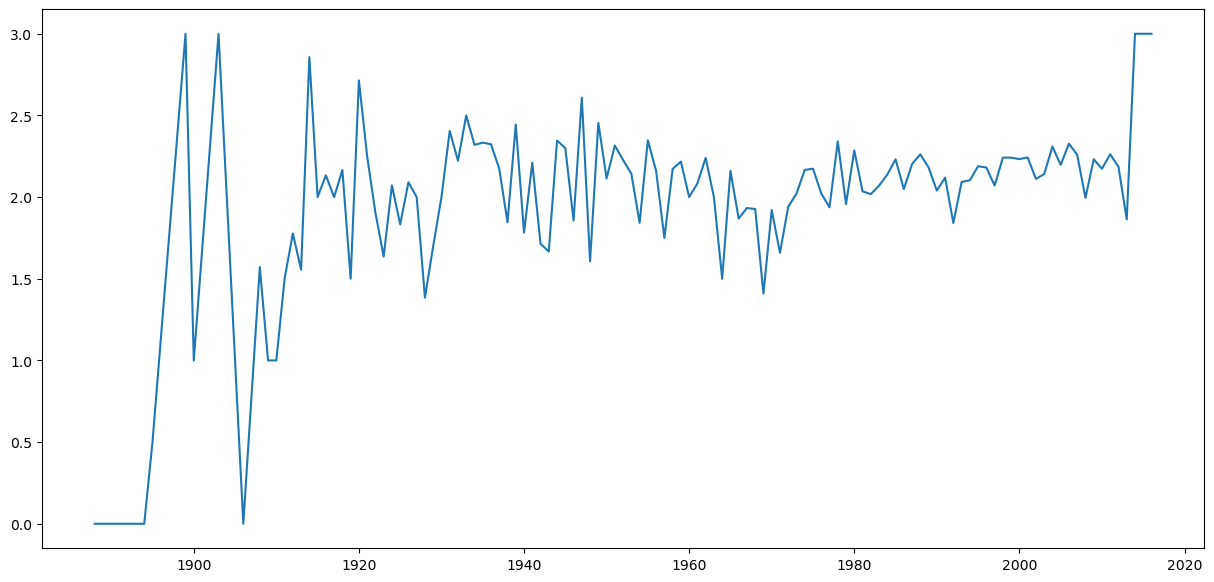

In [19]:
# Average Bechdel score by year
plt.figure(figsize=(15, 7))
plt.plot(movie_metadata_v3.groupby('Year')['rating'].mean())
plt.show()

In [20]:
# Explode the 'Genres Reduced' column to have one genre per row
merged_exploded_genres = merged_on_title.explode('Genres Reduced')


In [21]:
merged_exploded_genres.head()

,Unnamed: 0,title,imdbid,id,rating,year,Freebase movie ID,Movie name,Movie release date,Year,Month,Day,Movie box office revenue,Movie runtime,Languages,Countries,Genres Reduced
0,2,Sallie Gardner at a Gallop,2221420.0,9603,0,1878,/m/0b6f62m,Sallie Gardner at a Gallop,NaN,NaN,NaN,NaN,NaN,0.05,['Silent film'],['United States of America'],"['Silent', 'Short Film']"
1,13,Roundhay Garden Scene,392728.0,8040,0,1888,/m/044ggd,Roundhay Garden Scene,1888-01-01,1888.0,1.0,1.0,NaN,0.03,['Silent film'],['United Kingdom'],"['Silent', 'Short Film', 'Independent', 'Black..."
2,18,"Leisurely Pedestrians, Open Topped Buses and H...",466876.0,9619,0,1889,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",1889-01-01,1889.0,1.0,1.0,NaN,NaN,"['Silent film', 'English Language']",['United Kingdom'],"['Silent', 'Short Film', 'Independent', 'Black..."
3,19,Hyde Park Corner,2116898.0,9945,0,1889,/m/064kpp3,Hyde Park Corner,1935-01-01,1935.0,1.0,1.0,NaN,85.00,[],['United Kingdom'],"['Crime', 'Thriller', 'Drama', 'Film Adaptation']"
4,20,"Monkeyshines, No. 1",361921.0,9617,0,1890,/m/0g53t3,"Monkeyshines, No. 1",1890-01-01,1890.0,1.0,1.0,NaN,NaN,['Silent film'],['United States of America'],['Silent']


In [22]:

# Calculate the mean Bechdel score per genre and the standard error
genre_mean_se = merged_exploded_genres.groupby('Genres Reduced')['rating'].agg(['mean', 'sem', 'count']).reset_index()

# Calculate the 95% confidence interval for the mean Bechdel score per genre
# Assuming the t-distribution since the exact population standard deviation is unknown
ci95_hi = []
ci95_lo = []

for i in genre_mean_se.index:
    m, se, c = genre_mean_se.loc[i, ['mean', 'sem', 'count']]
    ci95_hi.append(m + 1.96*se/np.sqrt(c))
    ci95_lo.append(m - 1.96*se/np.sqrt(c))

genre_mean_se['ci95_hi'] = ci95_hi
genre_mean_se['ci95_lo'] = ci95_lo

# Sort the genres by mean score for better visualization
genre_mean_se_sorted = genre_mean_se.sort_values(by='mean', ascending=False)

# Plotting
plt.figure(figsize=(15,10))
sns.barplot(x='mean', y='Genres Reduced', data=genre_mean_se_sorted, xerr=(genre_mean_se_sorted['ci95_hi'] - genre_mean_se_sorted['mean']))
plt.xlabel('Mean Bechdel Score')
plt.ylabel('Genre')
plt.title('Mean Bechdel Score per Genre with 95% Confidence Intervals')
plt.axvline(x=0, color='grey', lw=0.5)  # Adding a line for reference at mean score of 0
plt.tight_layout()  # Adjust the plot to ensure complete visibility
plt.show()

C:\Users\arist\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:43: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\arist\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:39: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


KeyboardInterrupt: 

Visualizations

In [ ]:
# Sort the dataframe by 'Male (%)' in descending order to visualize from most to least percentage of males
sorted_gender_by_genre_df = genre_gender_counts.sort_values('Male (%)', ascending=False)

# Define colors for male and female, with a distinct color for the 'Total' category
colors_male = ['#6fa8dc' if genre != 'Total' else 'b' for genre in sorted_gender_by_genre_df['Genres Reduced']]
colors_female = ['#ffbcda' if genre != 'Total' else 'r' for genre in sorted_gender_by_genre_df['Genres Reduced']]


# Set up the figure and axis for the bar chart again with the sorted data
plt.figure(figsize=(14, 8))

# Recreate the index for the sorted dataframe
index = np.arange(len(sorted_gender_by_genre_df['Genres Reduced']))

# Plotting both 'Male (%)' and 'Female (%)' for the sorted dataframe
bar1 = plt.bar(index, sorted_gender_by_genre_df['Male (%)'], bar_width, label='Male (%)', color=colors_male)
bar2 = plt.bar(index + bar_width, sorted_gender_by_genre_df['Female (%)'], bar_width, label='Female (%)', color=colors_female)

# Add some text for labels, title, and axes ticks
plt.xlabel('Genres')
plt.ylabel('Percentage')
plt.title('Percentage of Male and Female Actors by Genre (Sorted by Male %)')
plt.xticks(index + bar_width / 2, sorted_gender_by_genre_df['Genres Reduced'], rotation=90)
plt.legend()
plt.grid(axis='y')

# # Adding the percentage values on top of the bars
# for bar in bar1 + bar2:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


NameError: name 'bar_width' is not defined

<Figure size 1400x800 with 0 Axes>